# Modelo matematico de transmisión de Leishmaniasis Cutánea Americana en Colombia

## Definición del modelo original

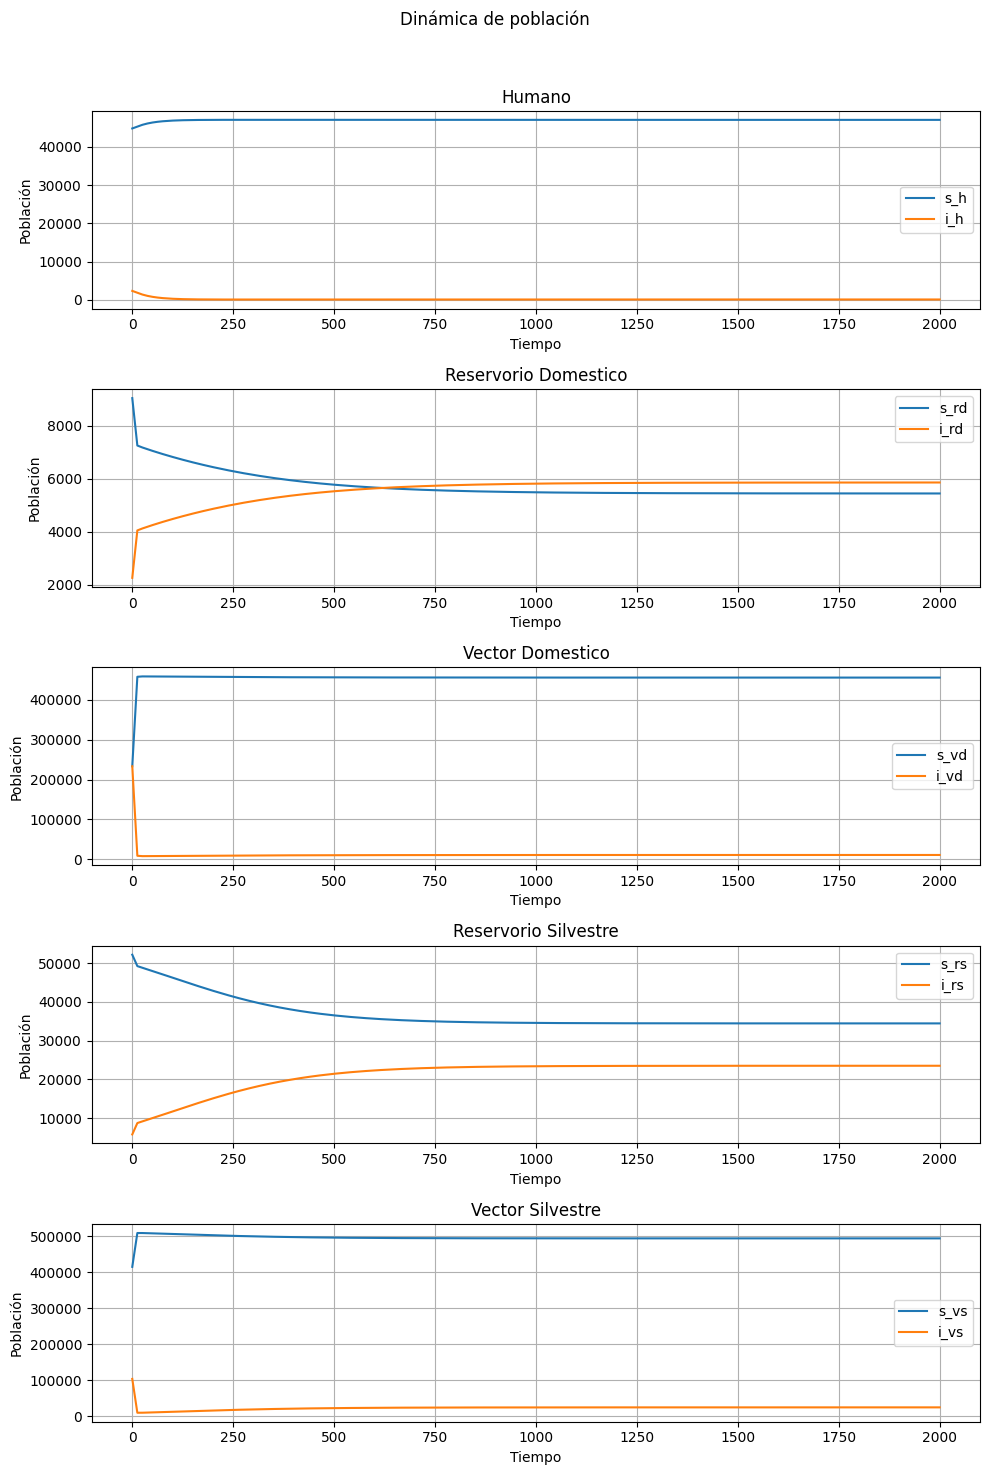

115.21331178202153


In [1]:
'Codigo Modelo'

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Modelo

def model(N,t,mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao):
    s_h, i_h = N[0:2]
    s_rd, i_rd = N[2:4]
    s_vd, i_vd = N[4:6]
    s_rs, i_rs = N[6:8]
    s_vs, i_vs = N[8:10]
    
    dsh_dt = mu_h*(s_h + i_h) + gamma_h*i_h - mu_h*s_h -((a_h*p_h*s_h*i_vd)/(s_h +i_h))
    dih_dt = ((a_h*p_h*s_h*i_vd)/(s_h +i_h)) - gamma_h*i_h - mu_h*i_h
    dsrd_dt = mu_rd*(s_rd + i_rd) + gamma_rd*i_rd - mu_rd*s_rd -((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd))
    dird_dt = ((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd)) - gamma_rd*i_rd - mu_rd*i_rd
    dsvd_dt = mu_vd*(s_vd + i_vd) - mu_vd*s_vd -(((a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs)))
    divd_dt = (((a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs))) - mu_vd*i_vd
    dsrs_dt = mu_rs*(s_rs + i_rs) + gamma_rs*i_rs - mu_rs*s_rs -(((tao*a_rs*p_rs*s_rs*i_vd)+((1-tao)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs))
    dirs_dt = (((tao*a_rs*p_rs*s_rs*i_vd)+((1-tao)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs)) - gamma_rs*i_rs - mu_rs*i_rs
    dsvs_dt = mu_vs*(s_vs + i_vs) - mu_vs*s_vs - (((1-tao)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs))
    divs_dt = (((1-tao)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs)) - mu_vs*i_vs

    return [dsh_dt,dih_dt,dsrd_dt,dird_dt,dsvd_dt,divd_dt,dsrs_dt,dirs_dt,dsvs_dt,divs_dt]

## Parametros

mu_h = 1/25550
mu_rd = 1/1248
mu_vd = 0.42
mu_rs = 1/730
mu_vs = 0.42
gamma_h = 0.024
gamma_rd = 0.003
gamma_rs = 0.0067
a_h = 0.009
a_rd = 0.045
a_rs =0.13
p_h = 0.03
p_rd = 0.1
p_rs = 0.1
p_vh = 0.4
p_vrd = 0.4
p_vrs = 0.4
tao = 0.006

## Condiciones iniciales
n_h = 47129 
n_rd = 0.24*n_h
n_vs = 11*n_h
n_n = 1.23*n_h
n_vd = 9.9*n_h
h0 = (0.95*n_h,0.05*n_h)
rd0 = (0.8*n_rd,0.2*n_rd)
vd0 = (0.5*n_vd,0.5*n_vd)
rs0 = (0.9*n_n,0.1*n_n)
vs0 = (0.8*n_vs,0.2*n_vs)

N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
t = np.linspace(0,2000,160)
solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))


# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Dinámica de población')

# Primer subplot
axs[0].plot(t, solution[:, 0], label='s_h')
axs[0].plot(t, solution[:, 1], label='i_h')
axs[0].set_title('Humano')
axs[0].legend()

# Segundo subplot
axs[1].plot(t, solution[:, 2], label='s_rd')
axs[1].plot(t, solution[:, 3], label='i_rd')
axs[1].set_title('Reservorio Domestico')
axs[1].legend()

# Tercer subplot
axs[2].plot(t, solution[:, 4], label='s_vd')
axs[2].plot(t, solution[:, 5], label='i_vd')
axs[2].set_title('Vector Domestico')
axs[2].legend()

# Cuarto subplot
axs[3].plot(t, solution[:, 6], label='s_rs')
axs[3].plot(t, solution[:, 7], label='i_rs')
axs[3].set_title('Reservorio Silvestre')
axs[3].legend()

# Quinto subplot
axs[4].plot(t, solution[:, 8], label='s_vs')
axs[4].plot(t, solution[:, 9], label='i_vs')
axs[4].set_title('Vector Silvestre')
axs[4].legend()

# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Población')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print(solution[159, 1])

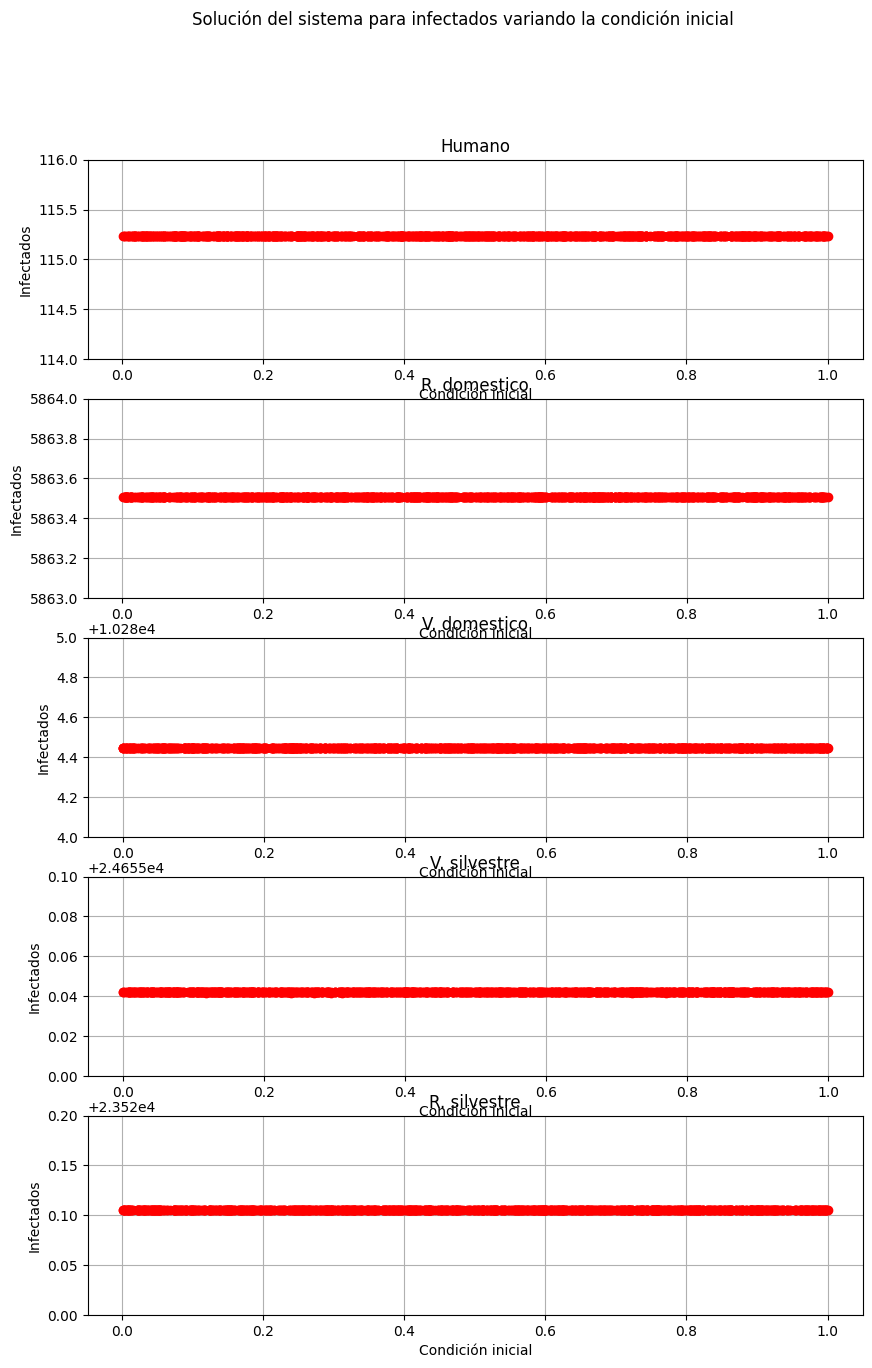

In [13]:
'Estabilidad del equilibrio'

variaciones = np.linspace(0,1,1000)

cond_ini_h = []
cond_ini_rd = []
cond_ini_rs = []
cond_ini_vs = []
cond_ini_vd = []

result_h = []
result_rd = []
result_rs = []
result_vd = []
result_vs = []

for i in range(0,1000):
    h = np.random.rand()
    rd = np.random.rand()
    vd = np.random.rand()
    rs = np.random.rand()
    vs= np.random.rand()
    h0 = (h*n_h,(1-h)*n_h)
    rd0 = (rd*n_rd,(1-rd)*n_rd)
    vd0 = (vd*n_vd,(1-vd)*n_vd)
    rs0 = (rs*n_n,(1-rs)*n_n)
    vs0 = (vs*n_vs,(1-vs)*n_vs)
    N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
    t = np.linspace(0,9000,160)
    solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))

    cond_ini_h.append(1-h)
    cond_ini_rd.append(1-rd)
    cond_ini_rs.append(1-rs)
    cond_ini_vs.append(1-vs)
    cond_ini_vd.append(1-vd)
    result_h.append(solution[159, 1])
    result_rd.append(solution[159, 3])
    result_rs.append(solution[159, 7])
    result_vd.append(solution[159, 5])
    result_vs.append(solution[159, 9])
# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Solución del sistema para infectados variando la condición inicial')

# Primer subplot
axs[0].plot(cond_ini_h, result_h, 'ro')
axs[0].set_title('Humano')
axs[0].set_ylim([114,116])

# Segundo subplot
axs[1].plot(cond_ini_rd, result_rd, 'ro')
axs[1].set_title('R. domestico')
axs[1].set_ylim([5863,5864])

# Tercer subplot
axs[2].plot(cond_ini_vd, result_vd, 'ro')
axs[2].set_title('V. domestico')
axs[2].set_ylim([10284,10285])

# Cuarto subplot
axs[3].plot(cond_ini_vs, result_vs, 'ro')
axs[3].set_title('V. silvestre')
axs[3].set_ylim([24655,24655.1])

# Quinto subplot
axs[4].plot(cond_ini_rs, result_rs, 'ro')
axs[4].set_title('R. silvestre')
axs[4].set_ylim([23520,23520.2])
# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Condición inicial')
    ax.set_ylabel('Infectados')
    ax.grid(True)

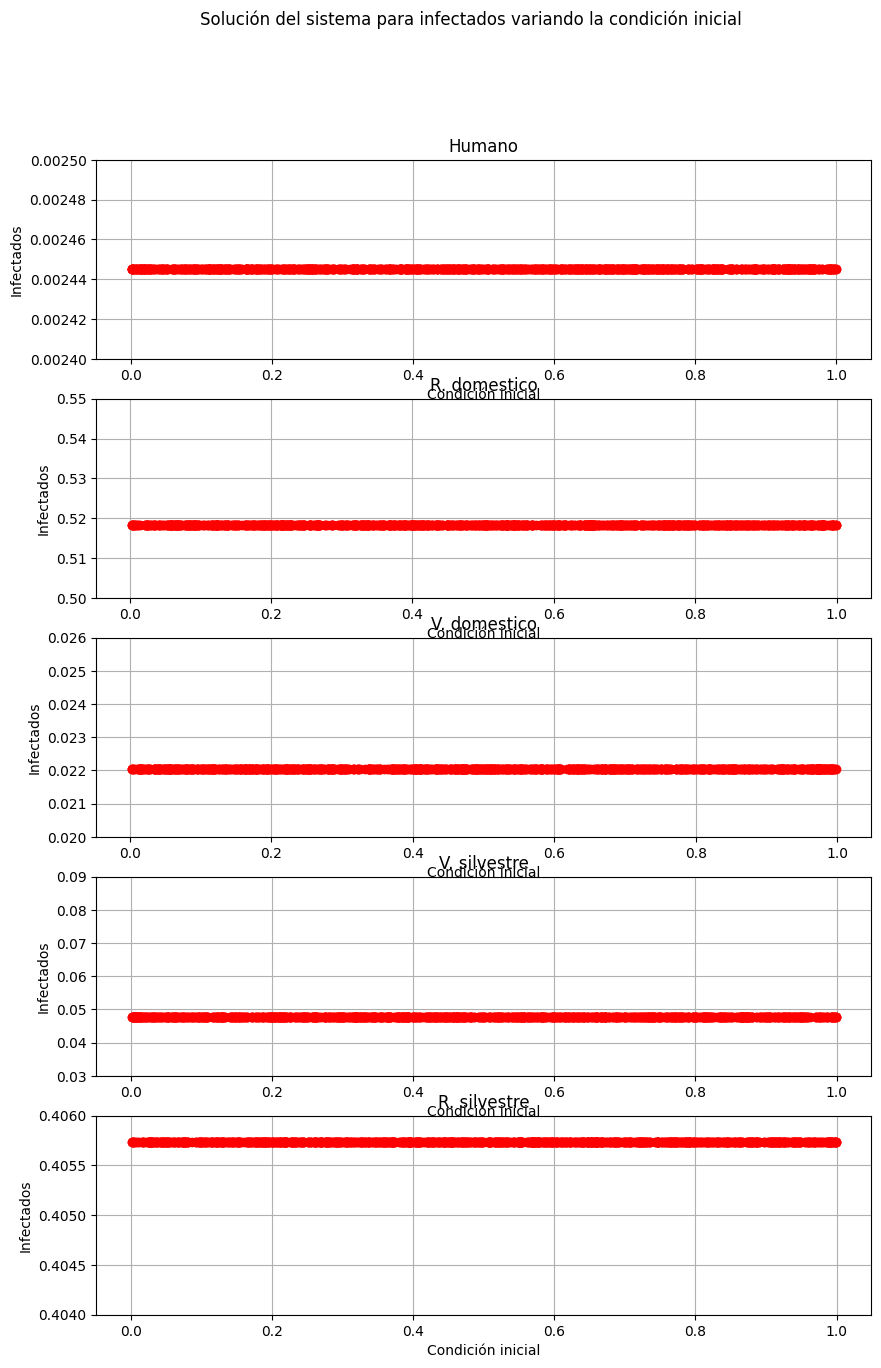

In [14]:
'Estabilidad del equilibrio'

variaciones = np.linspace(0,1,1000)

cond_ini_h = []
cond_ini_rd = []
cond_ini_rs = []
cond_ini_vs = []
cond_ini_vd = []

result_h = []
result_rd = []
result_rs = []
result_vd = []
result_vs = []

for i in range(0,1000):
    h = np.random.rand()
    rd = np.random.rand()
    vd = np.random.rand()
    rs = np.random.rand()
    vs= np.random.rand()
    h0 = (h*n_h,(1-h)*n_h)
    rd0 = (rd*n_rd,(1-rd)*n_rd)
    vd0 = (vd*n_vd,(1-vd)*n_vd)
    rs0 = (rs*n_n,(1-rs)*n_n)
    vs0 = (vs*n_vs,(1-vs)*n_vs)
    N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
    t = np.linspace(0,9000,160)
    solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))

    cond_ini_h.append(1-h)
    cond_ini_rd.append(1-rd)
    cond_ini_rs.append(1-rs)
    cond_ini_vs.append(1-vs)
    cond_ini_vd.append(1-vd)
    result_h.append(solution[159, 1]/n_h)
    result_rd.append(solution[159, 3]/n_rd)
    result_rs.append(solution[159, 7]/n_n)
    result_vd.append(solution[159, 5]/n_vd)
    result_vs.append(solution[159, 9]/n_vs)
# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Solución del sistema para infectados variando la condición inicial')

# Primer subplot
axs[0].plot(cond_ini_h, result_h, 'ro')
axs[0].set_title('Humano')
axs[0].set_ylim([0.0024,0.0025])

# Segundo subplot
axs[1].plot(cond_ini_rd, result_rd, 'ro')
axs[1].set_title('R. domestico')
axs[1].set_ylim([0.5,0.55])

# Tercer subplot
axs[2].plot(cond_ini_vd, result_vd, 'ro')
axs[2].set_title('V. domestico')
axs[2].set_ylim([0.020,0.026])
# Cuarto subplot
axs[3].plot(cond_ini_vs, result_vs, 'ro')
axs[3].set_title('V. silvestre')
axs[3].set_ylim([0.03,0.09])
# Quinto subplot
axs[4].plot(cond_ini_rs, result_rs, 'ro')
axs[4].set_title('R. silvestre')
axs[4].set_ylim([0.404,0.406])
# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Condición inicial')
    ax.set_ylabel('Infectados')
    ax.grid(True)





\begin{bmatrix}
0 & 0 & \frac{a_h p_h}{\mu_{vd}} & 0 & 0 \\
0 & 0 & \frac{a_{rd} p_{rd}}{\mu_{vd}} & 0 & 0 \\
\frac{a_h p_{vh} s_{vd}}{(\gamma_h + \mu_h) n_h} & \frac{a_{rd} p_{vrd} s_{vd}}{(\gamma_{rd} + \mu_{rd}) n_{rd}} & 0 & \frac{\tau (a_{rs} p_{vrs} s_{vd})}{(\gamma_{rs} + \mu_{rs}) n_n} & 0 \\
0 & 0 & \frac{\tau a_{rs} p_{rs}}{\mu_{vd} n_n} & 0 & \frac{(1 - \tau) a_{rs} p_{rs}}{\mu_{vd} n_n} \\
0 & 0 & 0 & \frac{(1 - \tau) (a_{rs} p_{vrs} s_{vs})}{(\gamma_{rs} + \mu_{rs}) n_n} & 0
\end{bmatrix}




In [15]:
'Calculo del R0'
# Definir la matriz
s_h = h0[0]
s_rd = rd0[0]
s_n = rs0[0]
s_vs = vs0[0]
s_vd = vd0[0]
NGM = np.array([[0,0,(a_h*p_h*n_h)/(mu_vd*n_h),0,0],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao*a_rs*p_rs*n_n)/(mu_vd*n_n),0,((1-tao)*a_rs*p_rs*n_n)/(mu_vd*n_n)],
              [0,0,0,((1-tao)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

# Calcular los valores propios
valores_propios, _ = np.linalg.eig(NGM)
R0 = max(abs(valores_propios))
# Imprimir los valores propios
print("Los valores propios de la matriz son:")
print(valores_propios)
print("El valor del R0 es:")
print(R0)

Los valores propios de la matriz son:
[-2.22044605e-16 -1.44710982e+00 -1.32741880e+00  1.44710982e+00
  1.32741880e+00]
El valor del R0 es:
1.447109815832603


In [25]:
'Sensibilidad infectados (Humanos)'

a_h_l = np.linspace(0,0.08,160)
a_rs_l = [0,0.1,0.2,0.4]
a_rd_l = [0,0.1,0.2,0.4]
l_11 = []
l_12 = []
l_13 = []
l_14 = []
for i in a_h_l:
        a_h = i
        a_rs =  a_rs_l[0]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_11.append([i,solution[159,1]])
for i in a_h_l:
        a_h = i
        a_rs =  a_rs_l[1]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_12.append([i,solution[159,1]])
for i in a_h_l:
        a_h = i
        a_rs =  a_rs_l[2]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_13.append([i,solution[159,1]])
for i in a_h_l:
        a_h = i
        a_rs =  a_rs_l[3]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_14.append([i,solution[159,1]])

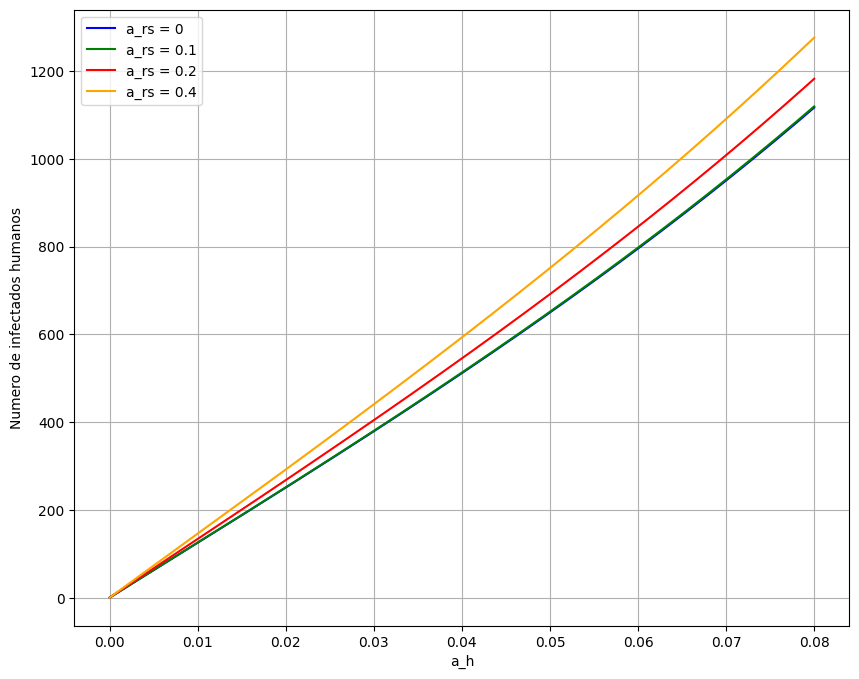

In [32]:
# Convertir l_1 a un array para facilitar el manejo
l_11 = np.array(l_11)
l_12 = np.array(l_12)
l_13 = np.array(l_13)
l_14 = np.array(l_14)

# Separar los valores de a_h, a_rs y la sensibilidad (infectados)
X1 = l_11[:, 0]
Y1 = l_11[:, 1]
X2 = l_12[:, 0]
Y2 = l_12[:, 1]
X3 = l_13[:, 0]
Y3 = l_13[:, 1]
X4 = l_14[:, 0]
Y4 = l_14[:, 1]
# Crear la gráfica de superficie
plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, color='blue', label=f'a_rs = {a_rs_l[0]}')
plt.plot(X2, Y2, color='green',label=f'a_rs = {a_rs_l[1]}')
plt.plot(X3, Y3, color='red', label=f'a_rs = {a_rs_l[2]}')
plt.plot(X4, Y4, color='orange', label=f'a_rs = {a_rs_l[3]}')
# Añadir etiquetas y título

plt.xlabel('a_h')
plt.ylabel('Numero de infectados humanos')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()



In [49]:
'Sensibilidad infectados (Humanos)'
a_h_l = np.linspace(0,0.08,160)
a_rs_l = [0,0.1,0.2,0.4]
a_rd_l = [0,0.1,0.2,0.4]
l_21 = []
l_22 = []
l_23 = []
l_24 = []
for i in a_h_l:
        a_h = i
        a_rd = a_rd_l[0]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_21.append([i,solution[159,1]])
for i in a_h_l:
        a_h = i
        a_rd = a_rd_l[1]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_22.append([i,solution[159,1]])
for i in a_h_l:
        a_h = i
        a_rd = a_rd_l[2]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_23.append([i,solution[159,1]])
for i in a_h_l:
        a_h = i
        a_rd = a_rd_l[3]
        solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao))
        l_24.append([i,solution[159,1]])

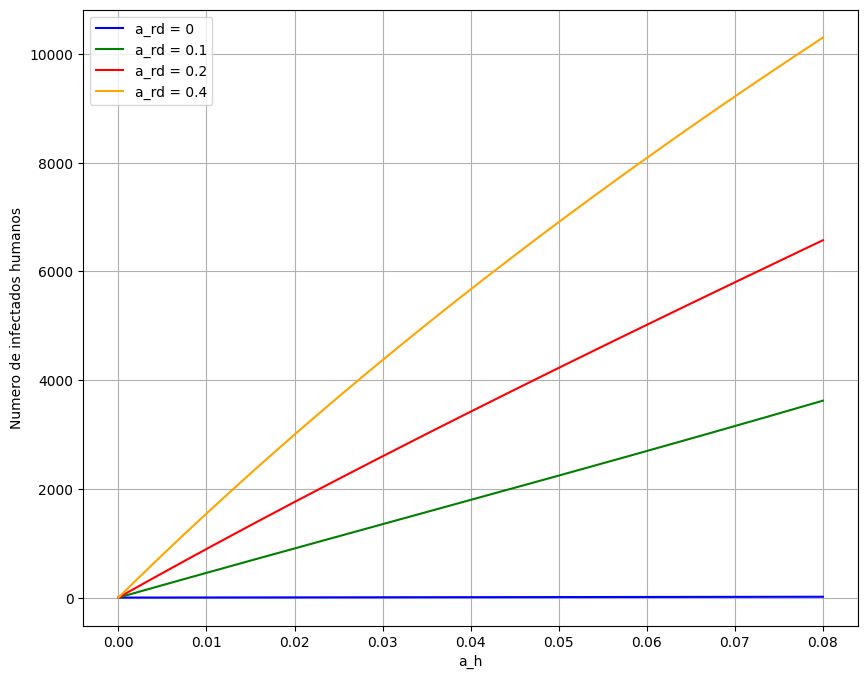

In [50]:

# Convertir l_1 a un array para facilitar el manejo
l_21 = np.array(l_21)
l_22 = np.array(l_22)
l_23 = np.array(l_23)
l_24 = np.array(l_24)

# Separar los valores de a_h, a_rs y la sensibilidad (infectados)
X1 = l_21[:, 0]
Y1 = l_21[:, 1]
X2 = l_22[:, 0]
Y2 = l_22[:, 1]
X3 = l_23[:, 0]
Y3 = l_23[:, 1]
X4 = l_24[:, 0]
Y4 = l_24[:, 1]
# Crear la gráfica de superficie
plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, color='blue', label=f'a_rd = {a_rd_l[0]}')
plt.plot(X2, Y2, color='green',label=f'a_rd = {a_rd_l[1]}')
plt.plot(X3, Y3, color='red', label=f'a_rd = {a_rd_l[2]}')
plt.plot(X4, Y4, color='orange', label=f'a_rd = {a_rd_l[3]}')
# Añadir etiquetas y título

plt.xlabel('a_h')
plt.ylabel('Numero de infectados humanos')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()

In [46]:
'Sensibilidad R0'
a_h_l = np.linspace(0,1,160)
p_vh_l = [0, 0.1, 0.25, 0.5]
r0_l1 = []
r0_l2 = []
r0_l3 = []
r0_l4 = []
for i in a_h_l:
        a_h = i
        p_vh =  p_vh_l[0]
        # Definir la matriz 
        NGM = np.array([[0,0,(a_h*p_h*n_h)/(mu_vd*n_h),0,0],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao*a_rs*p_rs*n_n)/(mu_vd*n_n),0,((1-tao)*a_rs*p_rs*n_n)/(mu_vd*n_n)],
              [0,0,0,((1-tao)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])
        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l1.append([i,R0])
for i in a_h_l:
        a_h = i
        p_vh =  p_vh_l[1]
        # Definir la matriz 
        NGM = np.array([[0,0,(a_h*p_h*n_h)/(mu_vd*n_h),0,0],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao*a_rs*p_rs*n_n)/(mu_vd*n_n),0,((1-tao)*a_rs*p_rs*n_n)/(mu_vd*n_n)],
              [0,0,0,((1-tao)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])
        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l2.append([i,R0])
for i in a_h_l:
        a_h = i
        p_vh =  p_vh_l[2]
        # Definir la matriz 
        NGM = np.array([[0,0,(a_h*p_h*n_h)/(mu_vd*n_h),0,0],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao*a_rs*p_rs*n_n)/(mu_vd*n_n),0,((1-tao)*a_rs*p_rs*n_n)/(mu_vd*n_n)],
              [0,0,0,((1-tao)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])
        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l3.append([i,R0])
for i in a_h_l:
        a_h = i
        p_vh =  p_vh_l[3]
        # Definir la matriz 
        NGM = np.array([[0,0,(a_h*p_h*n_h)/(mu_vd*n_h),0,0],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao*a_rs*p_rs*n_n)/(mu_vd*n_n),0,((1-tao)*a_rs*p_rs*n_n)/(mu_vd*n_n)],
              [0,0,0,((1-tao)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])
        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l4.append([i,R0])
print(r0_l1[0])

[0.0, 1.4467807760916056]


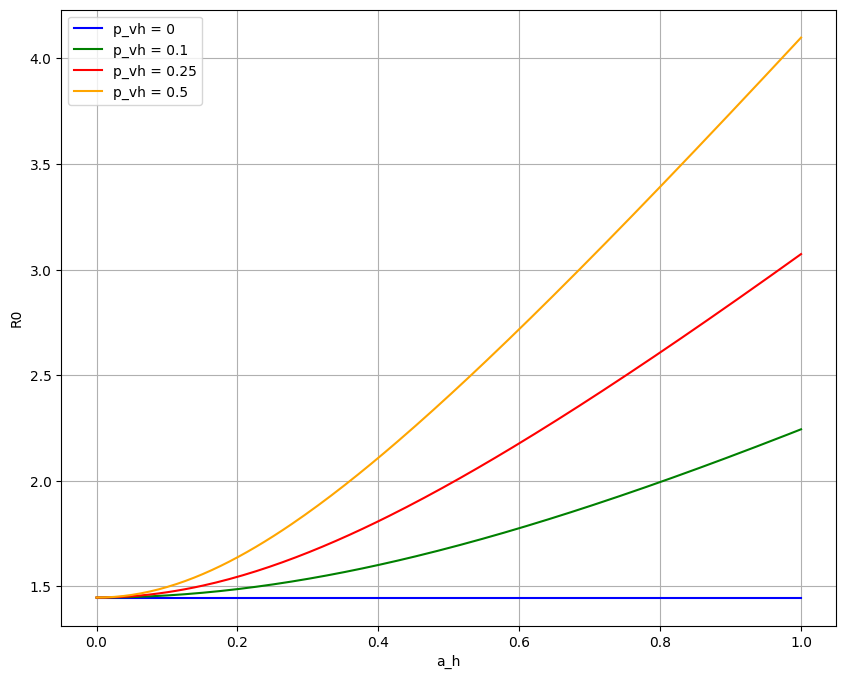

In [47]:
# Convertir l_1 a un array para facilitar el manejo
r0_l1  = np.array(r0_l1 )
r0_l2  = np.array(r0_l2 )
r0_l3  = np.array(r0_l3 )
r0_l4  = np.array(r0_l4 )

# Separar los valores de a_h, a_rs y la sensibilidad (infectados)
X1 = r0_l1[:, 0]
Y1 = r0_l1[:, 1]
X2 = r0_l2[:, 0]
Y2 = r0_l2[:, 1]
X3 = r0_l3[:, 0]
Y3 = r0_l3[:, 1]
X4 = r0_l4[:, 0]
Y4 = r0_l4[:, 1]
# Crear la gráfica de superficie
plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, color='blue', label=f'p_vh = {p_vh_l[0]}')
plt.plot(X2, Y2, color='green',label=f'p_vh = {p_vh_l[1]}')
plt.plot(X3, Y3, color='red', label=f'p_vh = {p_vh_l[2]}')
plt.plot(X4, Y4, color='orange', label=f'p_vh = {p_vh_l[3]}')
# Añadir etiquetas y título

plt.xlabel('a_h')
plt.ylabel('R0')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()

## Codigo modelo nuevo

\begin{align*}
\frac{ds_h}{dt} &= \mu_h (s_h + i_h) + \gamma_h i_h - \mu_h s_h - \left( \frac{\tau_h a_h p_h s_h i_{vd}}{s_h + i_h} + \frac{(1 - \tau_h) a_h p_h s_h i_{vs}}{s_h + i_h} \right) \\
\frac{di_h}{dt} &= \left( \frac{\tau_h a_h p_h s_h i_{vd}}{s_h + i_h} + \frac{(1 - \tau_h) a_h p_h s_h i_{vs}}{s_h + i_h} \right) - \gamma_h i_h - \mu_h i_h \\
\frac{ds_{rd}}{dt} &= \mu_{rd} (s_{rd} + i_{rd}) + \gamma_{rd} i_{rd} - \mu_{rd} s_{rd} - \frac{a_{rd} p_{rd} s_{rd} i_{vd}}{s_{rd} + i_{rd}} \\
\frac{di_{rd}}{dt} &= \frac{a_{rd} p_{rd} s_{rd} i_{vd}}{s_{rd} + i_{rd}} - \gamma_{rd} i_{rd} - \mu_{rd} i_{rd} \\
\frac{ds_{vd}}{dt} &= \mu_{vd} (s_{vd} + i_{vd}) - \mu_{vd} s_{vd} - \left( \frac{\tau_h a_h p_{vh} s_{vd} i_h}{s_h + i_h} + \frac{a_{rd} p_{vrd} s_{vd} i_{rd}}{s_{rd} + i_{rd}} + \frac{\tau_n a_{rs} p_{vrs} s_{vd} i_{rs}}{s_{rs} + i_{rs}} \right) \\
\frac{di_{vd}}{dt} &= \left( \frac{\tau_h a_h p_{vh} s_{vd} i_h}{s_h + i_h} + \frac{a_{rd} p_{vrd} s_{vd} i_{rd}}{s_{rd} + i_{rd}} + \frac{\tau_n a_{rs} p_{vrs} s_{vd} i_{rs}}{s_{rs} + i_{rs}} \right) - \mu_{vd} i_{vd} \\
\frac{ds_{rs}}{dt} &= \mu_{rs} (s_{rs} + i_{rs}) + \gamma_{rs} i_{rs} - \mu_{rs} s_{rs} - \frac{\tau_n a_{rs} p_{rs} s_{rs} i_{vd} + (1 - \tau_n) a_{rs} p_{rs} s_{rs} i_{vs}}{s_{rs} + i_{rs}} \\
\frac{di_{rs}}{dt} &= \frac{\tau_n a_{rs} p_{rs} s_{rs} i_{vd} + (1 - \tau_n) a_{rs} p_{rs} s_{rs} i_{vs}}{s_{rs} + i_{rs}} - \gamma_{rs} i_{rs} - \mu_{rs} i_{rs} \\
\frac{ds_{vs}}{dt} &= \mu_{vs} (s_{vs} + i_{vs}) - \mu_{vs} s_{vs} - \frac{(1 - \tau_n) a_{rs} p_{vrs} s_{vs} i_{rs}}{s_{rs} + i_{rs}} \\
\frac{di_{vs}}{dt} &= \frac{(1 - \tau_n) a_{rs} p_{vrs} s_{vs} i_{rs}}{s_{rs} + i_{rs}} + \frac{(1 - \tau_h) a_h p_{vh} s_{vs} i_h}{s_h + i_h} - \mu_{vs} i_{vs}
\end{align*}


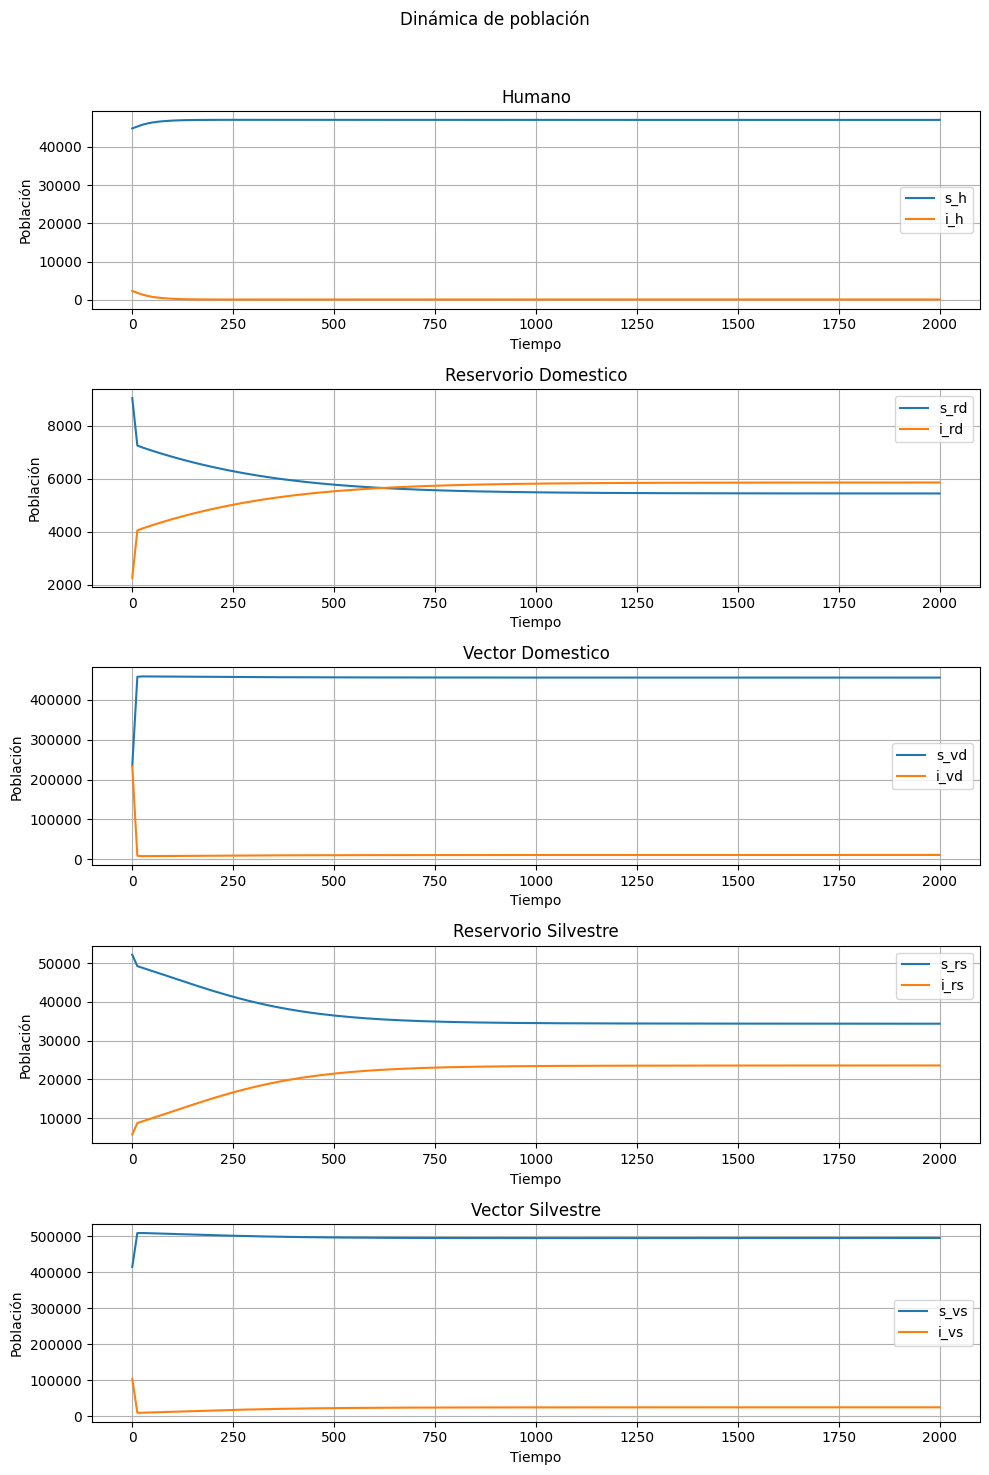

131.43809858440744


In [1]:
'Codigo Modelo nuevo'

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Modelo

def model(N,t,mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n):
    s_h, i_h = N[0:2]
    s_rd, i_rd = N[2:4]
    s_vd, i_vd = N[4:6]
    s_rs, i_rs = N[6:8]
    s_vs, i_vs = N[8:10]
    
    dsh_dt = mu_h*(s_h + i_h) + gamma_h*i_h - mu_h*s_h -((tao_h*a_h*p_h*s_h*i_vd)/(s_h +i_h)+((1-tao_h)*a_h*p_h*s_h*i_vs)/(s_h +i_h))
    dih_dt = ((tao_h*a_h*p_h*s_h*i_vd)/(s_h +i_h)+((1-tao_h)*a_h*p_h*s_h*i_vs)/(s_h +i_h)) - gamma_h*i_h - mu_h*i_h
    dsrd_dt = mu_rd*(s_rd + i_rd) + gamma_rd*i_rd - mu_rd*s_rd -((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd))
    dird_dt = ((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd)) - gamma_rd*i_rd - mu_rd*i_rd
    dsvd_dt = mu_vd*(s_vd + i_vd) - mu_vd*s_vd -(((tao_h*a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao_n*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs)))
    divd_dt = (((tao_h*a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao_n*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs))) - mu_vd*i_vd
    dsrs_dt = mu_rs*(s_rs + i_rs) + gamma_rs*i_rs - mu_rs*s_rs -(((tao_n*a_rs*p_rs*s_rs*i_vd)+((1-tao_n)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs))
    dirs_dt = (((tao_n*a_rs*p_rs*s_rs*i_vd)+((1-tao_n)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs)) - gamma_rs*i_rs - mu_rs*i_rs
    dsvs_dt = mu_vs*(s_vs + i_vs) - mu_vs*s_vs - (((1-tao_n)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs))
    divs_dt = (((1-tao_n)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs)+((1-tao_h)*a_h*p_vh*i_h*s_vs)/(s_h +i_h)) - mu_vs*i_vs

    return [dsh_dt,dih_dt,dsrd_dt,dird_dt,dsvd_dt,divd_dt,dsrs_dt,dirs_dt,dsvs_dt,divs_dt]

## Parametros

mu_h = 1/25550
mu_rd = 1/1248
mu_vd = 0.42
mu_rs = 1/730
mu_vs = 0.42
gamma_h = 0.024
gamma_rd = 0.003
gamma_rs = 0.0067
a_h = 0.009
a_rd = 0.045
a_rs =0.13
p_h = 0.03
p_rd = 0.1
p_rs = 0.1
p_vh = 0.4
p_vrd = 0.4
p_vrs = 0.4
tao_n = 0.006
tao_h = 0.9
## Condiciones iniciales
n_h = 47129.0 
n_rd = 0.24*n_h
n_vs = float(11*n_h)
n_n = 1.23*n_h
n_vd = 9.9*n_h
h0 = (0.95*n_h,0.05*n_h)
rd0 = (0.8*n_rd,0.2*n_rd)
vd0 = (0.5*n_vd,0.5*n_vd)
rs0 = (0.9*n_n,0.1*n_n)
vs0 = (0.8*n_vs,0.2*n_vs)

N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
t = np.linspace(0,2000,160)
solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n))


# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Dinámica de población')

# Primer subplot
axs[0].plot(t, solution[:, 0], label='s_h')
axs[0].plot(t, solution[:, 1], label='i_h')
axs[0].set_title('Humano')
axs[0].legend()

# Segundo subplot
axs[1].plot(t, solution[:, 2], label='s_rd')
axs[1].plot(t, solution[:, 3], label='i_rd')
axs[1].set_title('Reservorio Domestico')
axs[1].legend()

# Tercer subplot
axs[2].plot(t, solution[:, 4], label='s_vd')
axs[2].plot(t, solution[:, 5], label='i_vd')
axs[2].set_title('Vector Domestico')
axs[2].legend()

# Cuarto subplot
axs[3].plot(t, solution[:, 6], label='s_rs')
axs[3].plot(t, solution[:, 7], label='i_rs')
axs[3].set_title('Reservorio Silvestre')
axs[3].legend()

# Quinto subplot
axs[4].plot(t, solution[:, 8], label='s_vs')
axs[4].plot(t, solution[:, 9], label='i_vs')
axs[4].set_title('Vector Silvestre')
axs[4].legend()

# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Población')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(solution[159, 1])

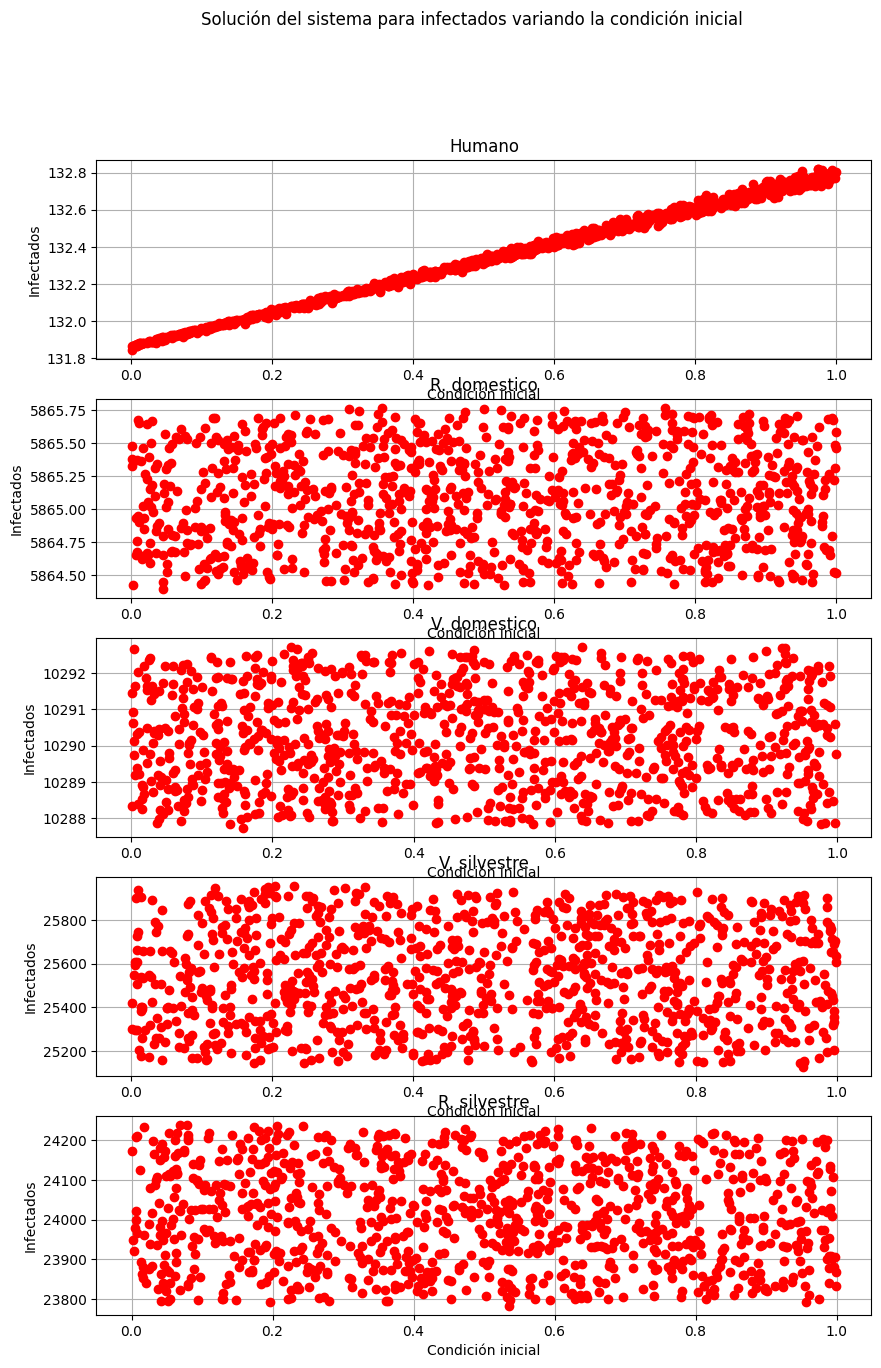

In [2]:
'Estabilidad del equilibrio'

variaciones = np.linspace(0,1,1000)

cond_ini_h = []
cond_ini_rd = []
cond_ini_rs = []
cond_ini_vs = []
cond_ini_vd = []

result_h = []
result_rd = []
result_rs = []
result_vd = []
result_vs = []

for i in range(0,1000):
    h = np.random.rand()
    rd = np.random.rand()
    vd = np.random.rand()
    rs = np.random.rand()
    vs= np.random.rand()
    h0 = (h*n_h,(1-h)*n_h)
    rd0 = (rd*n_rd,(1-rd)*n_rd)
    vd0 = (vd*n_vd,(1-vd)*n_vd)
    rs0 = (rs*n_n,(1-rs)*n_n)
    vs0 = (vs*n_vs,(1-vs)*n_vs)
    N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
    t = np.linspace(0,9000,160)
    solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n))

    cond_ini_h.append(1-h)
    cond_ini_rd.append(1-rd)
    cond_ini_rs.append(1-rs)
    cond_ini_vs.append(1-vs)
    cond_ini_vd.append(1-vd)
    result_h.append(solution[159, 1])
    result_rd.append(solution[159, 3])
    result_rs.append(solution[159, 7])
    result_vd.append(solution[159, 5])
    result_vs.append(solution[159, 9])
# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Solución del sistema para infectados variando la condición inicial')

# Primer subplot
axs[0].plot(cond_ini_h, result_h, 'ro')
axs[0].set_title('Humano')


# Segundo subplot
axs[1].plot(cond_ini_rd, result_rd, 'ro')
axs[1].set_title('R. domestico')


# Tercer subplot
axs[2].plot(cond_ini_vd, result_vd, 'ro')
axs[2].set_title('V. domestico')


# Cuarto subplot
axs[3].plot(cond_ini_vs, result_vs, 'ro')
axs[3].set_title('V. silvestre')


# Quinto subplot
axs[4].plot(cond_ini_rs, result_rs, 'ro')
axs[4].set_title('R. silvestre')

# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Condición inicial')
    ax.set_ylabel('Infectados')
    ax.grid(True)

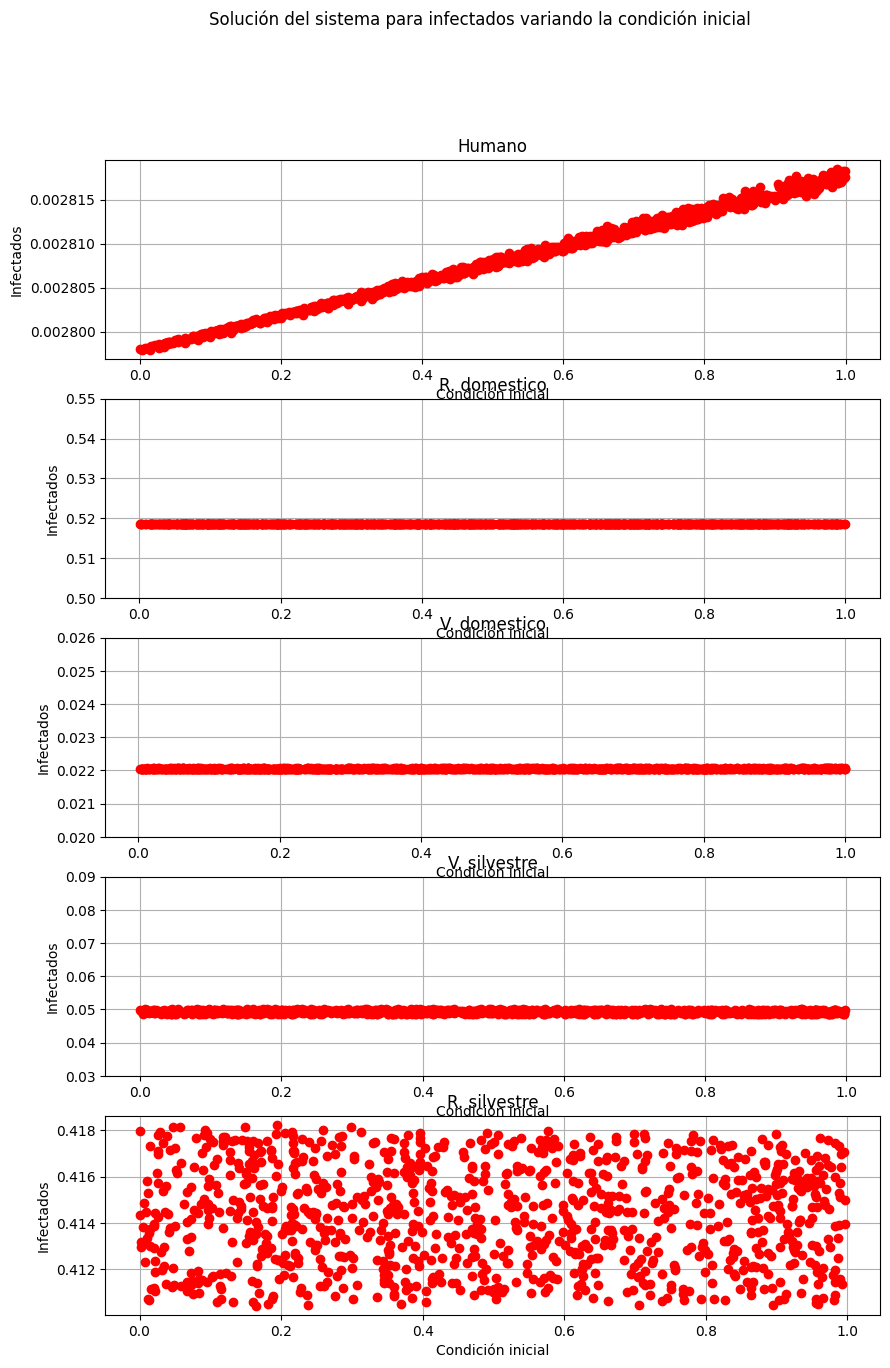

In [3]:

variaciones = np.linspace(0,1,1000)

cond_ini_h = []
cond_ini_rd = []
cond_ini_rs = []
cond_ini_vs = []
cond_ini_vd = []

result_h = []
result_rd = []
result_rs = []
result_vd = []
result_vs = []

for i in range(0,1000):
    h = np.random.rand()
    rd = np.random.rand()
    vd = np.random.rand()
    rs = np.random.rand()
    vs= np.random.rand()
    h0 = (h*n_h,(1-h)*n_h)
    rd0 = (rd*n_rd,(1-rd)*n_rd)
    vd0 = (vd*n_vd,(1-vd)*n_vd)
    rs0 = (rs*n_n,(1-rs)*n_n)
    vs0 = (vs*n_vs,(1-vs)*n_vs)
    N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
    t = np.linspace(0,9000,160)
    solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n))

    cond_ini_h.append(1-h)
    cond_ini_rd.append(1-rd)
    cond_ini_rs.append(1-rs)
    cond_ini_vs.append(1-vs)
    cond_ini_vd.append(1-vd)
    result_h.append(solution[159, 1]/n_h)
    result_rd.append(solution[159, 3]/n_rd)
    result_rs.append(solution[159, 7]/n_n)
    result_vd.append(solution[159, 5]/n_vd)
    result_vs.append(solution[159, 9]/n_vs)
# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Solución del sistema para infectados variando la condición inicial')

# Primer subplot
axs[0].plot(cond_ini_h, result_h, 'ro')
axs[0].set_title('Humano')


# Segundo subplot
axs[1].plot(cond_ini_rd, result_rd, 'ro')
axs[1].set_title('R. domestico')
axs[1].set_ylim([0.5,0.55])

# Tercer subplot
axs[2].plot(cond_ini_vd, result_vd, 'ro')
axs[2].set_title('V. domestico')
axs[2].set_ylim([0.020,0.026])
# Cuarto subplot
axs[3].plot(cond_ini_vs, result_vs, 'ro')
axs[3].set_title('V. silvestre')
axs[3].set_ylim([0.03,0.09])
# Quinto subplot
axs[4].plot(cond_ini_rs, result_rs, 'ro')
axs[4].set_title('R. silvestre')

# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Condición inicial')
    ax.set_ylabel('Infectados')
    ax.grid(True)



\begin{bmatrix}
0 & 0 & \frac{\tau_h a_h p_h s_h}{\mu_{vd} n_h} & 0 & \frac{(1 - \tau_h) a_h p_h s_h}{\mu_{vd} n_h} \\
0 & 0 & \frac{a_{rd} p_{rd} s_{rd}}{\mu_{vd} n_{rd}} & 0 & 0 \\
\frac{a_h p_{vh} s_{vd}}{(\gamma_h + \mu_h) n_h} & \frac{a_{rd} p_{vrd} s_{vd}}{(\gamma_{rd} + \mu_{rd}) n_{rd}} & 0 & \frac{\tau_n a_{rs} p_{vrs} s_{vd}}{(\gamma_{rs} + \mu_{rs}) n_n} & 0 \\
0 & 0 & \frac{\tau_n a_{rs} p_{rs}}{\mu_{vd} n_n} & 0 & \frac{(1 - \tau_n) a_{rs} p_{rs}}{\mu_{vd} n_n} \\
\frac{(1 - \tau_h) a_h p_h s_h}{(\gamma_h + \mu_h) n_h} & 0 & 0 & \frac{(1 - \tau_n) a_{rs} p_{vrs} s_{vs}}{(\gamma_{rs} + \mu_{rs}) n_n} & 0
\end{bmatrix}



In [4]:
'Calculo del R0'
# Definir la matriz
s_h = h0[0]
s_rd = rd0[0]
s_n = rs0[0]
s_vs = vs0[0]
s_vd = vd0[0]
NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

# Calcular los valores propios
valores_propios, _ = np.linalg.eig(NGM)
R0 = max(abs(valores_propios))
# Imprimir los valores propios
print("Los valores propios de la matriz son:")
print(valores_propios)
print("El valor del R0 es:")
print(R0)

Los valores propios de la matriz son:
[-1.44692120e+00  1.44692120e+00  5.63646252e-20  5.52031666e-03
 -5.52031666e-03]
El valor del R0 es:
1.4469212018866946


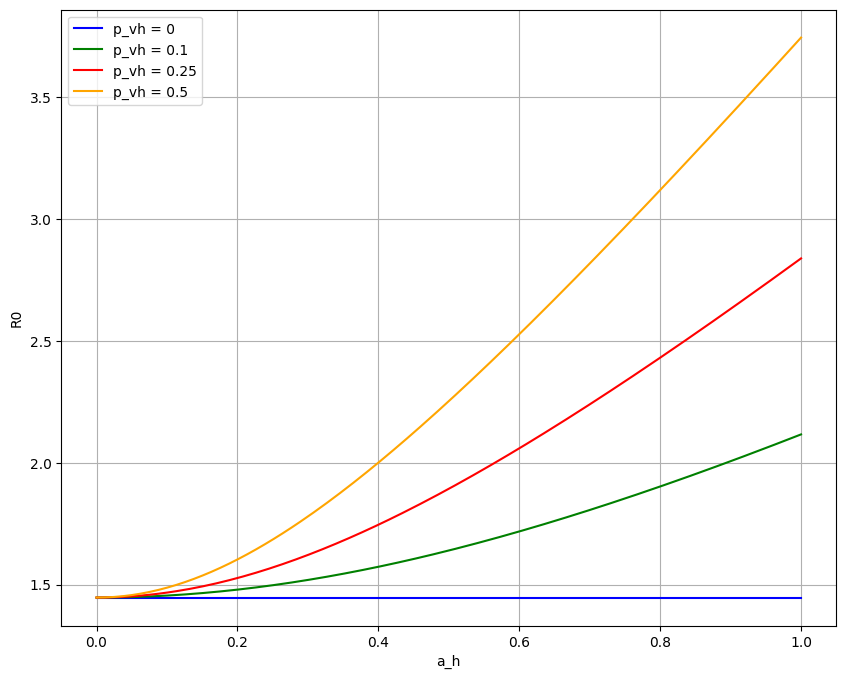

In [60]:
'Sensibilidad R0'
a_h_l = np.linspace(0,1,160)
p_vh_l = [0, 0.1, 0.25, 0.5]
r0_l1 = []
r0_l2 = []
r0_l3 = []
r0_l4 = []
for i in a_h_l:
        a_h = i
        p_vh = p_vh_l[0]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l1.append([i,R0])
for i in a_h_l:
        a_h = i
        p_vh = p_vh_l[1]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l2.append([i,R0])
for i in a_h_l:
        a_h = i
        p_vh = p_vh_l[2]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l3.append([i,R0])
for i in a_h_l:
        a_h = i
        p_vh = p_vh_l[3]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l4.append([i,R0])
# Convertir a array después de verificar
r0_l1 = np.array(r0_l1)
r0_l2 = np.array(r0_l2)
r0_l3 = np.array(r0_l3)
r0_l4 = np.array(r0_l4)
# Continuar con la creación de la gráfica
X1 = r0_l1[:, 0]
Y1 = r0_l1[:, 1]
X2 = r0_l2[:, 0]
Y2 = r0_l2[:, 1]
X3 = r0_l3[:, 0]
Y3 = r0_l3[:, 1]
X4 = r0_l4[:, 0]
Y4 = r0_l4[:, 1]

# Crear la gráfica de superficie
plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, color='blue', label=f'p_vh = {p_vh_l[0]}')
plt.plot(X2, Y2, color='green',label=f'p_vh = {p_vh_l[1]}')
plt.plot(X3, Y3, color='red', label=f'p_vh = {p_vh_l[2]}')
plt.plot(X4, Y4, color='orange', label=f'p_vh = {p_vh_l[3]}')
# Añadir etiquetas y título

plt.xlabel('a_h')
plt.ylabel('R0')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()


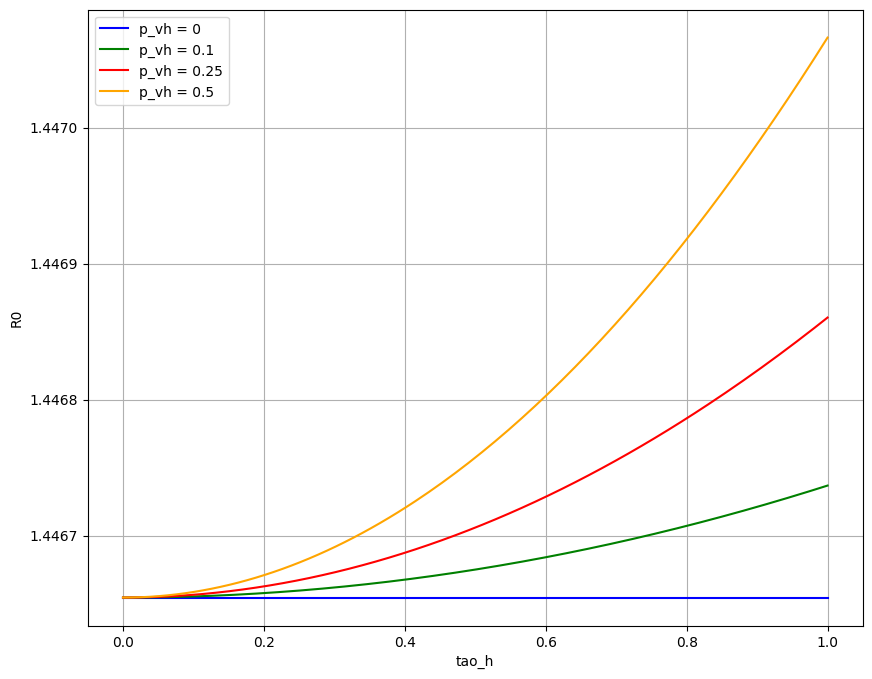

In [62]:
'Sensibilidad R0 - tao h'
tao_h_l = np.linspace(0,1,160)
p_vh_l = [0, 0.1, 0.25, 0.5]
r0_l1 = []
r0_l2 = []
r0_l3 = []
r0_l4 = []
for i in tao_h_l:
        tao_h = i
        p_vh = p_vh_l[0]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l1.append([i,R0])
for i in tao_h_l:
        tao_h = i
        p_vh = p_vh_l[1]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l2.append([i,R0])
for i in tao_h_l:
        tao_h = i
        p_vh = p_vh_l[2]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l3.append([i,R0])
for i in tao_h_l:
        tao_h = i
        p_vh = p_vh_l[3]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l4.append([i,R0])
# Convertir a array después de verificar
r0_l1 = np.array(r0_l1)
r0_l2 = np.array(r0_l2)
r0_l3 = np.array(r0_l3)
r0_l4 = np.array(r0_l4)
# Continuar con la creación de la gráfica
X1 = r0_l1[:, 0]
Y1 = r0_l1[:, 1]
X2 = r0_l2[:, 0]
Y2 = r0_l2[:, 1]
X3 = r0_l3[:, 0]
Y3 = r0_l3[:, 1]
X4 = r0_l4[:, 0]
Y4 = r0_l4[:, 1]

# Crear la gráfica de superficie
plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, color='blue', label=f'p_vh = {p_vh_l[0]}')
plt.plot(X2, Y2, color='green',label=f'p_vh = {p_vh_l[1]}')
plt.plot(X3, Y3, color='red', label=f'p_vh = {p_vh_l[2]}')
plt.plot(X4, Y4, color='orange', label=f'p_vh = {p_vh_l[3]}')
# Añadir etiquetas y título

plt.xlabel('tao_h')
plt.ylabel('R0')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()

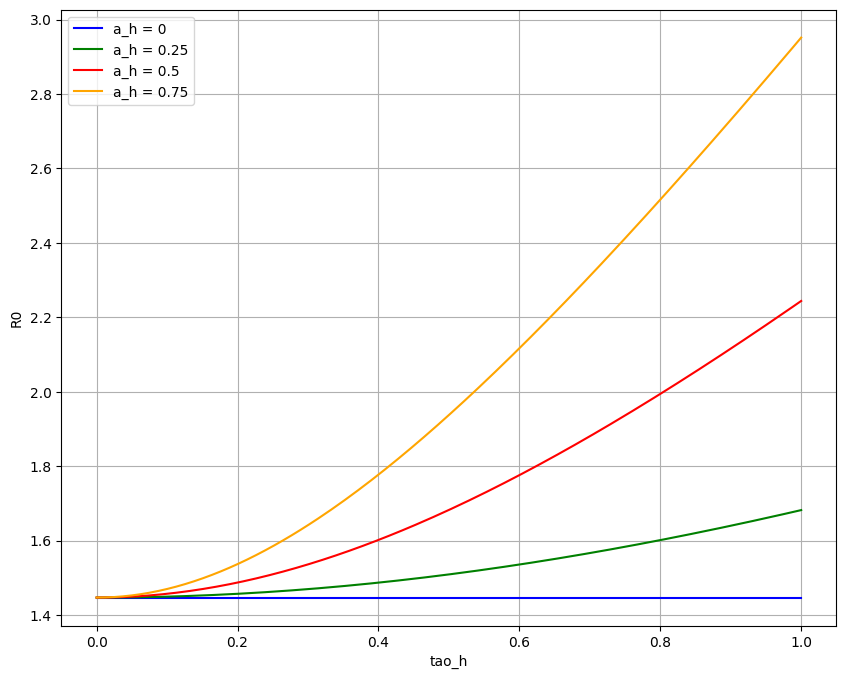

In [65]:
'Sensibilidad R0 - alpha h'
tao_h_l = np.linspace(0,1,160)
a_h_l = [0, 0.25, 0.5, 0.75]
r0_l1 = []
r0_l2 = []
r0_l3 = []
r0_l4 = []
for i in tao_h_l:
        tao_h = i
        a_h = a_h_l[0]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l1.append([i,R0])
for i in tao_h_l:
        tao_h = i
        a_h = a_h_l[1]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l2.append([i,R0])
for i in tao_h_l:
        tao_h = i
        a_h = a_h_l[2]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l3.append([i,R0])
for i in tao_h_l:
        tao_h = i
        a_h = a_h_l[3]
        # Definir la matriz 
        NGM = np.array([[0,0,(tao_h*a_h*p_h*n_h)/(mu_vd*n_h),0,((1-tao_h)*a_h*p_h*n_h)/(mu_vd*n_h)],
              [0,0,(a_rd*p_rd*n_rd)/(mu_vd*n_rd),0,0],
              [(tao_h*a_h*p_vh*n_vd)/((gamma_h + mu_h)*n_h),(a_rd*p_vrd*n_vd)/((gamma_rd + mu_rd)*n_rd),0,(tao_n*(a_rs*p_vrs*n_vd))/((gamma_rs + mu_rs)*n_n),0],
              [0,0,(tao_n*a_rs*p_rs)/(mu_vd*n_n),0,((1-tao_n)*a_rs*p_rs)/(mu_vd*n_n)],
              [((1-tao_h)*(a_h*p_h*n_h))/((gamma_h + mu_h)*n_h),0,0,((1-tao_n)*(a_rs*p_vrs*n_vs))/((gamma_rs + mu_rs)*n_n),0]])

        # Calcular los valores propios
        valores_propios, _ = np.linalg.eig(NGM)
        R0 = max(abs(valores_propios))
        r0_l4.append([i,R0])
# Convertir a array después de verificar
r0_l1 = np.array(r0_l1)
r0_l2 = np.array(r0_l2)
r0_l3 = np.array(r0_l3)
r0_l4 = np.array(r0_l4)
# Continuar con la creación de la gráfica
X1 = r0_l1[:, 0]
Y1 = r0_l1[:, 1]
X2 = r0_l2[:, 0]
Y2 = r0_l2[:, 1]
X3 = r0_l3[:, 0]
Y3 = r0_l3[:, 1]
X4 = r0_l4[:, 0]
Y4 = r0_l4[:, 1]

# Crear la gráfica de superficie
plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, color='blue', label=f'a_h = {a_h_l[0]}')
plt.plot(X2, Y2, color='green',label=f'a_h = {a_h_l[1]}')
plt.plot(X3, Y3, color='red', label=f'a_h = {a_h_l[2]}')
plt.plot(X4, Y4, color='orange', label=f'a_h = {a_h_l[3]}')
# Añadir etiquetas y título

plt.xlabel('tao_h')
plt.ylabel('R0')
plt.legend()
plt.grid(True)
# Mostrar la gráfica
plt.show()

In [ ]:
'Sensibilidad del R0 para cada parametro'

import numpy as np
from autograd import grad
from autograd import numpy as anp
from numpy.linalg import eig

# Definir la matriz NGM usando autograd.numpy
def NGM(tao_h, a_h, p_h, n_h, mu_vd, a_rd, p_rd, n_rd, tao_n, a_rs, p_rs, n_n, gamma_h, mu_h, p_vh, n_vd, gamma_rd, mu_rd, p_vrd, gamma_rs, mu_rs, p_vrs, n_vs):
    return anp.array([[0, 0, (tao_h * a_h * p_h * n_h) / (mu_vd * n_h), 0, ((1 - tao_h) * a_h * p_h * n_h) / (mu_vd * n_h)],
                      [0, 0, (a_rd * p_rd * n_rd) / (mu_vd * n_rd), 0, 0],
                      [(tao_h * a_h * p_vh * n_vd) / ((gamma_h + mu_h) * n_h), (a_rd * p_vrd * n_vd) / ((gamma_rd + mu_rd) * n_rd), 0, (tao_n * a_rs * p_vrs * n_vd) / ((gamma_rs + mu_rs) * n_n), 0],
                      [0, 0, (tao_n * a_rs * p_rs) / (mu_vd * n_n), 0, ((1 - tao_n) * a_rs * p_rs) / (mu_vd * n_n)],
                      [((1 - tao_h) * (a_h * p_h * n_h)) / ((gamma_h + mu_h) * n_h), 0, 0, ((1 - tao_n) * (a_rs * p_vrs * n_vs)) / ((gamma_rs + mu_rs) * n_n), 0]])

# Función para calcular el R0 (valor propio dominante de la NGM)
def R0(tao_h, a_h, p_h, n_h, mu_vd, a_rd, p_rd, n_rd, tao_n, a_rs, p_rs, n_n, gamma_h, mu_h, p_vh, n_vd, gamma_rd, mu_rd, p_vrd, gamma_rs, mu_rs, p_vrs, n_vs):
    matrix = NGM(tao_h, a_h, p_h, n_h, mu_vd, a_rd, p_rd, n_rd, tao_n, a_rs, p_rs, n_n, gamma_h, mu_h, p_vh, n_vd, gamma_rd, mu_rd, p_vrd, gamma_rs, mu_rs, p_vrs, n_vs)
    eigenvalues, _ = anp.linalg.eig(matrix)  # Calcula los valores propios
    R0_value = anp.max(eigenvalues)  # Toma la parte real del valor propio máximo
    return R0_value

params = (tao_h, a_h, p_h, n_h, mu_vd, a_rd, p_rd, n_rd, tao_n, a_rs, p_rs, n_n, gamma_h, mu_h, p_vh, n_vd, gamma_rd, mu_rd, p_vrd, gamma_rs, mu_rs, p_vrs, n_vs)

# Derivadas automáticas de R0 con respecto a cada parámetro
deriv_R0_tao_h = grad(R0, 0)  # Derivada con respecto a tao_h
deriv_R0_a_h = grad(R0, 1)    # Derivada con respecto a a_h
deriv_R0_p_h = grad(R0, 2)    # Derivada con respecto a p_h
deriv_R0_n_h = grad(R0, 3)    # Derivada con respecto a n_h
deriv_R0_mu_vd = grad(R0, 4)  # Derivada con respecto a mu_vd
deriv_R0_a_rd = grad(R0, 5)   # Derivada con respecto a a_rd
deriv_R0_p_rd = grad(R0, 6)   # Derivada con respecto a p_rd
deriv_R0_n_rd = grad(R0, 7)   # Derivada con respecto a n_rd
deriv_R0_tao_n = grad(R0, 8)  # Derivada con respecto a tao_n
deriv_R0_a_rs = grad(R0, 9)   # Derivada con respecto a a_rs
deriv_R0_p_rs = grad(R0, 10)  # Derivada con respecto a p_rs
deriv_R0_n_n = grad(R0, 11)   # Derivada con respecto a n_n
deriv_R0_gamma_h = grad(R0, 12) # Derivada con respecto a gamma_h
deriv_R0_mu_h = grad(R0, 13)  # Derivada con respecto a mu_h
deriv_R0_p_vh = grad(R0, 14)  # Derivada con respecto a p_vh
deriv_R0_n_vd = grad(R0, 15)  # Derivada con respecto a n_vd
deriv_R0_gamma_rd = grad(R0, 16) # Derivada con respecto a gamma_rd
deriv_R0_mu_rd = grad(R0, 17) # Derivada con respecto a mu_rd
deriv_R0_p_vrd = grad(R0, 18) # Derivada con respecto a p_vrd
deriv_R0_gamma_rs = grad(R0, 19) # Derivada con respecto a gamma_rs
deriv_R0_mu_rs = grad(R0, 20) # Derivada con respecto a mu_rs
deriv_R0_p_vrs = grad(R0, 21) # Derivada con respecto a p_vrs
deriv_R0_n_vs = grad(R0, 22)  # Derivada con respecto a n_vs

# Resultado de derivadas
print("Derivada de R0 con respecto a tao_h:", deriv_R0_tao_h(*params)) # Cada función de derivada grad recibe los mismos parametros que R0
print("Derivada de R0 con respecto a a_h:", deriv_R0_a_h(*params))
print("Derivada de R0 con respecto a p_h:", deriv_R0_p_h(*params))
print("Derivada de R0 con respecto a n_h:", deriv_R0_n_h(*params))
print("Derivada de R0 con respecto a mu_vd:", deriv_R0_mu_vd(*params))
print("Derivada de R0 con respecto a a_rd:", deriv_R0_a_rd(*params))
print("Derivada de R0 con respecto a p_rd:", deriv_R0_p_rd(*params))
print("Derivada de R0 con respecto a n_rd:", deriv_R0_n_rd(*params))
print("Derivada de R0 con respecto a tao_n:", deriv_R0_tao_n(*params))
print("Derivada de R0 con respecto a a_rs:", deriv_R0_a_rs(*params))
print("Derivada de R0 con respecto a p_rs:", deriv_R0_p_rs(*params))
print("Derivada de R0 con respecto a n_n:", deriv_R0_n_n(*params))
print("Derivada de R0 con respecto a gamma_h:", deriv_R0_gamma_h(*params))
print("Derivada de R0 con respecto a mu_h:", deriv_R0_mu_h(*params))
print("Derivada de R0 con respecto a p_vh:", deriv_R0_p_vh(*params))
print("Derivada de R0 con respecto a n_vd:", deriv_R0_n_vd(*params))
print("Derivada de R0 con respecto a gamma_rd:", deriv_R0_gamma_rd(*params))
print("Derivada de R0 con respecto a mu_rd:", deriv_R0_mu_rd(*params))
print("Derivada de R0 con respecto a p_vrd:", deriv_R0_p_vrd(*params))
print("Derivada de R0 con respecto a gamma_rs:", deriv_R0_gamma_rs(*params))
print("Derivada de R0 con respecto a mu_rs:", deriv_R0_mu_rs(*params))
print("Derivada de R0 con respecto a p_vrs:", deriv_R0_p_vrs(*params))
print("Derivada de R0 con respecto a n_vs:", deriv_R0_n_vs(*params))


Derivada de R0 con respecto a tao_h: 0.0005928307927214407
Derivada de R0 con respecto a a_h: 0.05928310262469655
Derivada de R0 con respecto a p_h: 0.008892465700983862
Derivada de R0 con respecto a n_h: -5.660505264120882e-09
Derivada de R0 con respecto a mu_vd: -1.7225252403413023
Derivada de R0 con respecto a a_rd: 32.14194785041798
Derivada de R0 con respecto a p_rd: 7.231938266344046
Derivada de R0 con respecto a n_rd: -6.393744002581606e-05
Derivada de R0 con respecto a tao_n: 1.1527004175552675e-07
Derivada de R0 con respecto a a_rs: 5.340480119533413e-09
Derivada de R0 con respecto a p_rs: 3.4713120776965243e-09
Derivada de R0 con respecto a n_n: -1.1976511028100931e-14
Derivada de R0 con respecto a gamma_h: -0.011097484083807407
Derivada de R0 con respecto a mu_h: -0.011097484083807407
Derivada de R0 con respecto a p_vh: 0.0006669348814818827
Derivada de R0 con respecto a n_vd: 1.5505703150273018e-06
Derivada de R0 con respecto a gamma_rd: -190.2499780016308
Derivada de R0 co

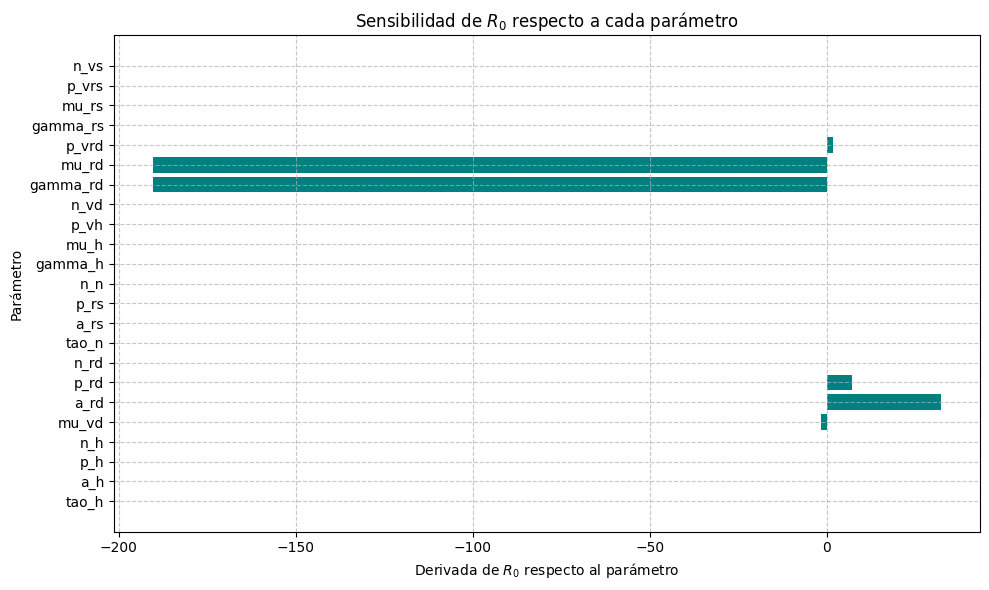

In [14]:
import matplotlib.pyplot as plt

# Nombres de los parámetros
parametros = ['tao_h', 'a_h', 'p_h', 'n_h', 'mu_vd', 'a_rd', 'p_rd', 'n_rd', 
              'tao_n', 'a_rs', 'p_rs', 'n_n', 'gamma_h', 'mu_h', 'p_vh', 
              'n_vd', 'gamma_rd', 'mu_rd', 'p_vrd', 'gamma_rs', 'mu_rs', 
              'p_vrs', 'n_vs']

# Valores de las derivadas
valores = [0.0005928307927214407, 0.05928310262469655, 0.008892465700983862, 
           -5.660505264120882e-09, -1.7225252403413023, 32.14194785041798, 
           7.231938266344046, -6.393744002581606e-05, 1.1527004175552675e-07, 
           5.340480119533413e-09, 3.4713120776965243e-09, -1.1976511028100931e-14, 
           -0.011097484083807407, -0.011097484083807407, 0.0006669348814818827, 
           1.5505703150273018e-06, -190.2499780016308, -190.2499780016308, 
           1.8079845665860108, -4.301574973211246e-08, -4.301574973211246e-08, 
           8.678280194242279e-10, 5.021849608678977e-18]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(parametros, valores, color='teal')
plt.xlabel('Derivada de $R_0$ respecto al parámetro')
plt.ylabel('Parámetro')
plt.title('Sensibilidad de $R_0$ respecto a cada parámetro')
plt.grid( linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


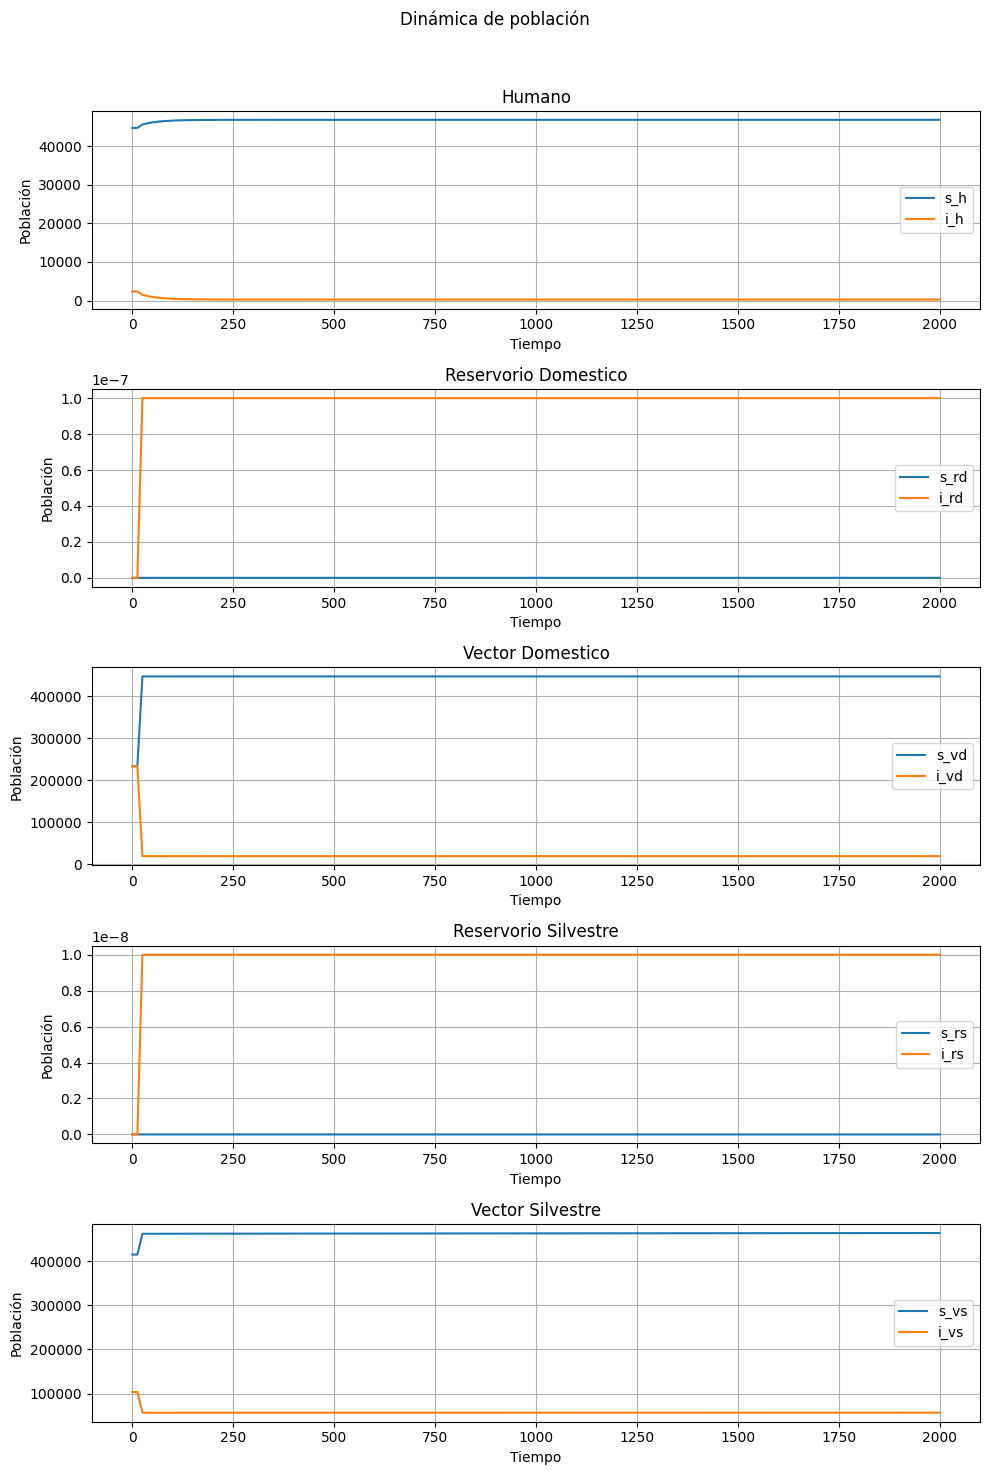

259.8561267432755


In [10]:
'Codigo Modelo nuevo'

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Modelo

def model(N,t,mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n):
    s_h, i_h = N[0:2]
    s_rd, i_rd = N[2:4]
    s_vd, i_vd = N[4:6]
    s_rs, i_rs = N[6:8]
    s_vs, i_vs = N[8:10]
    
    dsh_dt = mu_h*(s_h + i_h) + gamma_h*i_h - mu_h*s_h -((tao_h*a_h*p_h*s_h*i_vd)/(s_h +i_h)+((1-tao_h)*a_h*p_h*s_h*i_vs)/(s_h +i_h))
    dih_dt = ((tao_h*a_h*p_h*s_h*i_vd)/(s_h +i_h)+((1-tao_h)*a_h*p_h*s_h*i_vs)/(s_h +i_h)) - gamma_h*i_h - mu_h*i_h
    dsrd_dt = mu_rd*(s_rd + i_rd) + gamma_rd*i_rd - mu_rd*s_rd -((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd))
    dird_dt = ((a_rd*p_rd*s_rd*i_vd)/(s_rd +i_rd)) - gamma_rd*i_rd - mu_rd*i_rd
    dsvd_dt = mu_vd*(s_vd + i_vd) - mu_vd*s_vd -(((tao_h*a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao_n*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs)))
    divd_dt = (((tao_h*a_h*p_vh*s_vd*i_h)/(s_h +i_h))+((a_rd*p_vrd*s_vd*i_rd)/(s_rd +i_rd))+((tao_n*a_rs*p_vrs*s_vd*i_rs)/(s_rs +i_rs))) - mu_vd*i_vd
    dsrs_dt = mu_rs*(s_rs + i_rs) + gamma_rs*i_rs - mu_rs*s_rs -(((tao_n*a_rs*p_rs*s_rs*i_vd)+((1-tao_n)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs))
    dirs_dt = (((tao_n*a_rs*p_rs*s_rs*i_vd)+((1-tao_n)*a_rs*p_rs*s_rs*i_vs))/(s_rs +i_rs)) - gamma_rs*i_rs - mu_rs*i_rs
    dsvs_dt = mu_vs*(s_vs + i_vs) - mu_vs*s_vs - (((1-tao_n)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs))
    divs_dt = (((1-tao_n)*a_rs*p_vrs*i_rs*s_vs)/(s_rs +i_rs)+((1-tao_h)*a_h*p_vh*i_h*s_vs)/(s_h +i_h)) - mu_vs*i_vs

    return [dsh_dt,dih_dt,dsrd_dt,dird_dt,dsvd_dt,divd_dt,dsrs_dt,dirs_dt,dsvs_dt,divs_dt]

## Parametros

mu_h = 1/25550
mu_rd = 1/1248
mu_vd = 0.42
mu_rs = 1/730
mu_vs = 0.42
gamma_h = 0.024
gamma_rd = 0.003
gamma_rs = 0.0067
a_h = 0.009
a_rd = 0.045
a_rs =0.13
p_h = 0.03
p_rd = 0.1
p_rs = 0.1
p_vh = 0.4
p_vrd = 0.4
p_vrs = 0.4
tao_n = 0.006
tao_h = 0.9
## Condiciones iniciales
n_h = 47129.0 
n_rd = 1*10**-12
n_vs = float(11*n_h)
n_n = 1*10**-12
n_vd = 9.9*n_h
h0 = (0.95*n_h,0.05*n_h)
rd0 = (0.8*n_rd,0.2*n_rd)
vd0 = (0.5*n_vd,0.5*n_vd)
rs0 = (0.9*n_n,0.1*n_n)
vs0 = (0.8*n_vs,0.2*n_vs)

N0 = np.array([*h0, *rd0, *vd0, *rs0, *vs0])
t = np.linspace(0,2000,160)
solution = odeint(model,N0,t,args=(mu_h,mu_rd,mu_vd,mu_rs,mu_vs,gamma_h,gamma_rd,gamma_rs,a_h,a_rd,a_rs,p_h,p_rd,p_rs,p_vh,p_vrs,p_vrd,tao_h,tao_n))


# Graficar resultados
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Dinámica de población')

# Primer subplot
axs[0].plot(t, solution[:, 0], label='s_h')
axs[0].plot(t, solution[:, 1], label='i_h')
axs[0].set_title('Humano')
axs[0].legend()

# Segundo subplot
axs[1].plot(t, solution[:, 2], label='s_rd')
axs[1].plot(t, solution[:, 3], label='i_rd')
axs[1].set_title('Reservorio Domestico')
axs[1].legend()

# Tercer subplot
axs[2].plot(t, solution[:, 4], label='s_vd')
axs[2].plot(t, solution[:, 5], label='i_vd')
axs[2].set_title('Vector Domestico')
axs[2].legend()

# Cuarto subplot
axs[3].plot(t, solution[:, 6], label='s_rs')
axs[3].plot(t, solution[:, 7], label='i_rs')
axs[3].set_title('Reservorio Silvestre')
axs[3].legend()

# Quinto subplot
axs[4].plot(t, solution[:, 8], label='s_vs')
axs[4].plot(t, solution[:, 9], label='i_vs')
axs[4].set_title('Vector Silvestre')
axs[4].legend()

# Configuraciones adicionales
for ax in axs:
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Población')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(solution[159, 1])